In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("drug_consumption.csv", index_col=0)

In [62]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [63]:
print(df.columns)

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')


In [64]:
age_rep = {
    -0.95197: 0,  # 18 - 24
    -0.07854: 1,  # 25 - 34
     0.49788: 2,  # 35 - 44
     1.09449: 3,  # 45 - 54
     1.82213: 4,  # 55 - 64
     2.59171: 5   # 65+
}
gen_rep = {
     0.48246: 0,  # Mujer
    -0.48246: 1   # Hombre
}
edu_rep = {
    -2.43591: 0,  # Left School Before 16 years 28 1.49%
    -1.73790: 1,  # Left School at 16 years 99 5.25%
    -1.43719: 2,  # Left School at 17 years 30 1.59%
    -1.22751: 3,  # Left School at 18 years 100 5.31%
    -0.61113: 4,  # Some College,No Certificate Or Degree 506 26.84%
    -0.05921: 5,  # Professional Certificate/ Diploma 270 14.32%
    0.45468: 6,  # University Degree 480 25.46%
    1.16365: 7,  # Masters Degree 283 15.01%
    1.98437: 8   # Doctorate Degree 89 4.72%
}
cou_rep = {
    -0.09765: 0,  # Australia 54 2.86%
     0.24923: 1,  # Canada 87 4.62%
    -0.46841: 2,  # New Zealand 5 0.27%
    -0.28519: 3,  # Other 118 6.26%
     0.21128: 4,  # Republic of Ireland 20 1.06%
     0.96082: 5,  # UK 1044 55.38%
    -0.57009: 6   # USA 557 29.55%
}
eth_rep = {
    -0.50212: 0,  # Asian 26 1.38%
    -1.10702: 1,  # Black 33 1.75%
     1.90725: 2,  # Mixed-Black/Asian 3 0.16%
     0.12600: 3,  # Mixed-White/Asian 20 1.06%
    -0.22166: 4,  # Mixed-White/Black 20 1.06%
     0.11440: 5,  # Other 63 3.34%
    -0.31685: 6   # White 1720 91.25%
}
nsc_rep = {
    -3.46436: 12,
    -3.15735: 13,
    -2.75696: 14,
    -2.52197: 15,
    -2.42317: 16,
    -2.34360: 17,
    -2.21844: 18,
    -2.05048: 19,
    -1.86962: 20,
    -1.69163: 21,
    -1.55078: 22,
    -1.43907: 23,
    -1.32828: 24,
    -1.19430: 25,
    -1.05308: 26,
    -0.92104: 27,
    -0.79151: 28,
    -0.67825: 29,
    -0.58016: 30,
    -0.46725: 31,
    -0.34799: 32,
    -0.24649: 33,
    -0.14882: 34,
    -0.05188: 35,
     0.04257: 36,
     0.13606: 37,
     0.22393: 38,
     0.31287: 39,
     0.41667: 40,
     0.52135: 41,
     0.62967: 42,
     0.73545: 43,
     0.82562: 44,
     0.91093: 45,
     1.02119: 46,
     1.13281: 47,
     1.23461: 48,
     1.37297: 49,
     1.49158: 50,
     1.60383: 51,
     1.72012: 52,
     1.83990: 53,
     1.98437: 54,
     2.12700: 55,
     2.28554: 56,
     2.46262: 57,
     2.61139: 58,
     2.82196: 59,
     3.27393: 60
}
esc_rep = {
    -3.27393: 16,
    -3.00537: 17,
    -3.00537: 18,
    -2.72827: 19,
    -2.53830: 20,
    -2.44904: 21,
    -2.32338: 22,
    -2.21069: 23,
    -2.11437: 24,
    -2.03972: 25,
    -1.92173: 26,
    -1.76250: 27,
    -1.63340: 28,
    -1.50796: 29,
    -1.37639: 30,
    -1.23177: 31,
    -1.09207: 32,
    -0.94779: 33,
    -0.80615: 34,
    -0.69509: 35,
    -0.57545: 36,
    -0.43999: 37,
    -0.30033: 38,
    -0.15487: 39,
     0.00332: 40,
     0.16767: 41,
     0.32197: 42,
     0.47617: 43,
     0.63779: 44,
     0.80523: 45,
     0.96248: 46,
     1.11406: 47,
     1.28610: 48,
     1.45421: 49,
     1.58487: 50,
     1.74091: 51,
     1.93886: 52,
     2.12700: 53,
     2.32338: 54,
     2.57309: 55,
     2.85950: 56,
     2.85950: 57,
     3.00537: 58,
     3.27393: 59
}
osc_rep = {
    -3.27393: 24,
    -2.85950: 26,
    -2.63199: 28,
    -2.39883: 29,
    -2.21069: 30,
    -2.09015: 31,
    -1.97495: 32,
    -1.82919: 33,
    -1.68062: 34,
    -1.55521: 35,
    -1.42424: 36,
    -1.27553: 37,
    -1.11902: 38,
    -0.97631: 39,
    -0.84732: 40,
    -0.71727: 41,
    -0.58331: 42,
    -0.45174: 43,
    -0.31776: 44,
    -0.17779: 45,
    -0.01928: 46,
     0.14143: 47,
     0.29338: 48,
     0.44585: 49,
     0.58331: 50,
     0.72330: 51,
     0.88309: 52,
     1.06238: 53,
     1.24033: 54,
     1.43533: 55,
     1.65653: 56,
     1.88511: 57,
     1.15324: 58,
     2.44904: 59,
     2.90161: 60
}
asc_rep = {
    -3.46436: 12,
    -3.15735: 16,
    -3.00537: 18,
    -2.90161: 23,
    -2.78793: 24,
    -2.70172: 25,
    -2.53830: 26,
    -2.35413: 27,
    -2.21844: 28,
    -2.07848: 29,
    -1.92595: 30,
    -1.77200: 31,
    -1.62090: 32,
    -1.47955: 33,
    -1.34289: 34,
    -1.21213: 35,
    -1.07533: 36,
    -0.91699: 37,
    -0.76096: 38,
    -0.60633: 39,
    -0.45321: 40,
    -0.30172: 41,
    -0.15487: 42,
    -0.01729: 43,
     0.13136: 44,
     0.28783: 45,
     0.43852: 46,
     0.59042: 47,
     0.76096: 48,
     0.94156: 49,
     1.11406: 50,
     1.28610: 51,
     1.45039: 52,
     1.61108: 53,
     1.81866: 54,
     2.03972: 55,
     2.23427: 56,
     2.46262: 57,
     2.75696: 58,
     3.15735: 59,
     3.46436: 60
}
csc_rep = {
    -3.46436: 17,
    -3.15735: 19,
    -2.90161: 20,
    -2.72827: 21,
    -2.57309: 22,
    -2.42317: 23,
    -2.30408: 24,
    -2.18109: 25,
    -2.04506: 26,
    -1.92173: 27,
    -1.78169: 28,
    -1.64101: 29,
    -1.51840: 30,
    -1.38502: 31,
    -1.25773: 32,
    -1.13788: 33,
    -1.01450: 34,
    -0.89891: 35,
    -0.78155: 36,
    -0.65253: 37,
    -0.52745: 38,
    -0.40581: 39,
    -0.27607: 40,
    -0.14277: 41,
    -0.00665: 42,
     0.12331: 43,
     0.25953: 44,
     0.41594: 45,
     0.58489: 46,
     0.75830: 47,
     0.93949: 48,
     1.13407: 49,
     1.30612: 50,
     1.46191: 51,
     1.63088: 52,
     1.81175: 53,
     2.04506: 54,
     2.33337: 55,
     2.63199: 56,
     3.00537: 57,
     3.46436: 59
}
imp_rep = {
    -2.55524: 0,
    -1.37983: 1,
    -0.71126: 2,
    -0.21712: 3,
     0.19268: 4,
     0.52975: 5,
     0.88113: 6,
     1.29221: 7,
     1.86203: 8,
     2.90161: 9
}
sen_rep = {
    -2.07848: 0,
    -1.54858: 1,
    -1.18084: 2,
    -0.84637: 3,
    -0.52593: 4,
    -0.21575: 5,
     0.07987: 6,
     0.40148: 7,
     0.76540: 8,
     1.22470: 9,
     1.92173: 10
}
val_rep = {
    "CL0": 0,  # Never Used
    "CL1": 1,  # Used over a Decade Ago
    "CL2": 2,  # Used in Last Decade
    "CL3": 3,  # Used in Last Year
    "CL4": 4,  # Used in Last Month
    "CL5": 5,  # Used in Last Week
    "CL6": 6,  # Used in Last Day
}

In [65]:
rep_d = {
    "Age":       age_rep,
    "Gender":    gen_rep,
    "Education": edu_rep,
    "Country":   cou_rep,
    "Ethnicity": eth_rep,
    "Nscore":    nsc_rep,
    "Escore":    esc_rep,
    "Oscore":    osc_rep,
    "Ascore":    asc_rep,
    "Cscore":    csc_rep,
    "Impulsive": imp_rep,
    "SS":        sen_rep,
    "Alcohol":   val_rep,
    "Amphet":    val_rep,
    "Amyl":      val_rep,
    "Benzos":    val_rep,
    "Caff":      val_rep,
    "Cannabis":  val_rep,
    "Choc":      val_rep,
    "Coke":      val_rep,
    "Crack":     val_rep,
    "Ecstasy":   val_rep,
    "Heroin":    val_rep,
    "Ketamine":  val_rep,
    "Legalh":    val_rep,
    "LSD":       val_rep,
    "Meth":      val_rep,
    "Mushrooms": val_rep,
    "Nicotine":  val_rep,
    "Semer":     val_rep,
    "VSA":       val_rep
}

In [66]:
import numpy as np
for col, rep in rep_d.items():
    df[col] = df[col].replace(rep)
    # df[col] = df[col].apply(lambda x: rep.get(x, np.nan))
df.head()

/tmp/ipykernel_256003/583597415.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rep)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,5.0,5.0,3.0,39.0,36.0,42.0,37.0,42.0,...,0,0,0,0,0,0,0,2,0,0
2,1.0,1.0,8.0,5.0,6.0,29.0,52.0,55.0,48.0,41.0,...,4,0,2,0,2,3,0,4,0,0
3,2.0,1.0,5.0,5.0,6.0,31.0,45.0,40.0,32.0,34.0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,0.0,7.0,5.0,6.0,34.0,34.0,46.0,47.0,46.0,...,0,0,2,0,0,0,0,2,0,0
5,2.0,0.0,8.0,5.0,6.0,43.0,28.0,43.0,41.0,50.0,...,1,0,0,1,0,0,2,2,0,0


In [67]:
df_stats = df.describe().T
df_n = (df - df_stats['mean']) / df_stats['std']  # Para normalizar: (valor - promedio) / desv_estandar
df_n.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,...,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03,1.885000e+03
mean,-1.206226e-16,3.015566e-17,-2.332352e-16,6.785023e-17,2.940177e-16,-3.844847e-16,-4.900295e-16,4.749516e-16,3.185192e-16,-7.538915e-18,...,2.261674e-17,3.769457e-17,-3.769457e-17,1.507783e-17,4.523349e-17,-6.031132e-17,3.015566e-17,4.523349e-17,1.319310e-17,1.507783e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.053571e+00,-1.000265e+00,-2.826254e+00,-3.406690e+00,-5.565946e+00,-2.618414e+00,-3.480325e+00,-5.527682e+00,-4.794316e+00,-3.507744e+00,...,-7.975748e-01,-3.614349e-01,-4.665768e-01,-7.576734e-01,-7.119151e-01,-5.019489e-01,-8.096806e-01,-1.325858e+00,-5.993216e-02,-4.503670e-01
25%,-1.053571e+00,-1.000265e+00,-5.606836e-01,1.243837e-01,2.552903e-01,-7.576165e-01,-6.756574e-01,-5.392597e-01,-6.005358e-01,-6.369132e-01,...,-7.975748e-01,-3.614349e-01,-4.665768e-01,-7.576734e-01,-7.119151e-01,-5.019489e-01,-8.096806e-01,-9.115957e-01,-5.993216e-02,-4.503670e-01
50%,-2.707639e-01,9.992045e-01,5.708996e-03,1.243837e-01,2.552903e-01,8.594102e-03,6.241295e-02,1.028044e-01,2.076496e-02,8.079446e-02,...,-7.975748e-01,-3.614349e-01,-4.665768e-01,-7.576734e-01,-7.119151e-01,-5.019489e-01,-8.096806e-01,-8.307213e-02,-5.993216e-02,-4.503670e-01
75%,5.120428e-01,9.992045e-01,5.721015e-01,8.305984e-01,2.552903e-01,6.653461e-01,6.528692e-01,6.164557e-01,7.973909e-01,6.549606e-01,...,1.023291e+00,-3.614349e-01,-4.665768e-01,9.186346e-01,6.293742e-01,-5.019489e-01,5.542585e-01,1.159713e+00,-5.993216e-02,-4.503670e-01
max,2.860463e+00,9.992045e-01,1.704887e+00,8.305984e-01,2.552903e-01,2.635602e+00,2.867080e+00,1.900584e+00,2.661293e+00,2.521000e+00,...,2.844158e+00,5.436904e+00,4.451395e+00,2.594943e+00,3.311953e+00,3.141852e+00,3.282137e+00,1.159713e+00,2.504499e+01,5.784212e+00


In [68]:
df_n.corr()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
Age,1.000000,-0.096515,0.102742,-0.058735,0.034492,-0.144346,-0.027375,-0.146832,0.064484,0.186917,...,-0.382263,-0.121205,-0.223462,-0.410034,-0.315193,-0.189981,-0.326742,-0.247647,-0.047530,-0.226922
Gender,-0.096515,1.000000,-0.187843,-0.017922,0.019699,-0.070393,-0.061300,0.095914,-0.220387,-0.183907,...,0.228574,0.136728,0.189825,0.315676,0.278983,0.181489,0.272431,0.192084,-0.013354,0.134852
Education,0.102742,-0.187843,1.000000,0.024342,-0.081377,-0.091267,0.114404,0.087335,0.083234,0.222598,...,-0.139231,-0.124315,-0.060418,-0.180455,-0.155212,-0.158711,-0.143811,-0.229926,-0.035508,-0.107700
Country,-0.058735,-0.017922,0.024342,1.000000,-0.027407,0.046895,-0.007712,0.040999,0.026120,-0.010862,...,-0.017003,0.078670,-0.061147,0.034388,-0.036595,0.112094,0.005668,0.003195,-0.020773,0.034236
Ethnicity,0.034492,0.019699,-0.081377,-0.027407,1.000000,0.006542,-0.036923,0.031024,-0.002744,-0.032908,...,0.065880,0.014684,0.042775,0.063754,0.049222,0.053153,0.059663,0.076259,-0.062262,0.000523
Nscore,-0.144346,-0.070393,-0.091267,0.046895,0.006542,1.000000,-0.432916,0.012592,-0.215145,-0.398679,...,0.073118,0.178116,0.063777,0.119392,0.041423,0.188743,0.045118,0.131790,-0.004590,0.116464
Escore,-0.027375,-0.061300,0.114404,-0.007712,-0.036923,-0.432916,1.000000,0.160753,0.159237,0.318612,...,0.072299,-0.083435,0.013466,-0.044362,0.012403,-0.128343,0.014708,-0.022110,0.022429,-0.036275
Oscore,-0.146832,0.095914,0.087335,0.040999,0.031024,0.012592,0.160753,1.000000,0.046318,-0.039596,...,0.217027,0.054008,0.110778,0.224489,0.230144,0.090491,0.256698,0.142090,-0.021083,0.124612
Ascore,0.064484,-0.220387,0.083234,0.026120,-0.002744,-0.215145,0.159237,0.046318,1.000000,0.249609,...,-0.117037,-0.175819,-0.116269,-0.143375,-0.096731,-0.161807,-0.115250,-0.113132,0.017803,-0.116232
Cscore,0.186917,-0.183907,0.222598,-0.010862,-0.032908,-0.398679,0.318612,-0.039596,0.249609,1.000000,...,-0.221914,-0.163249,-0.158438,-0.262005,-0.164566,-0.197298,-0.194655,-0.230603,0.008192,-0.164444


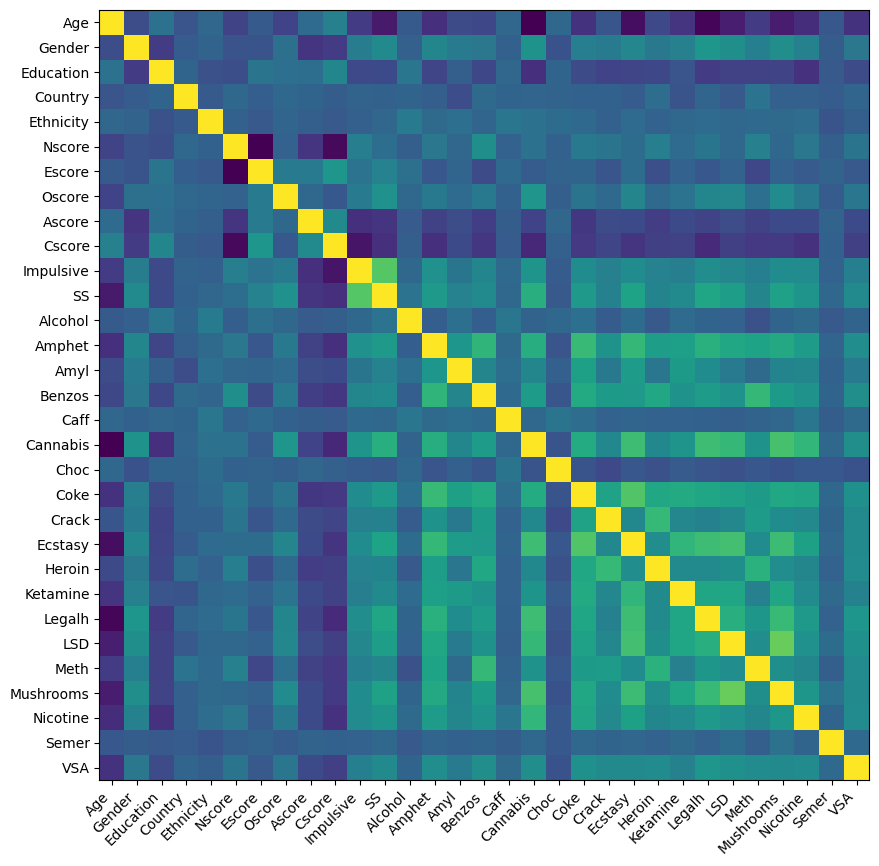

In [69]:
import matplotlib.pyplot as plt
labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df_n.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df_n.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df_n.columns.to_list(), ha='right');

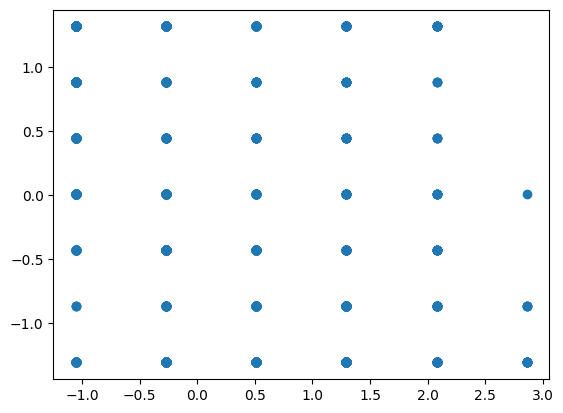

In [70]:
xs, ys, zs = df_n[['Age', 'Gender', 'Cannabis']].to_numpy().T
plt.plot(xs, zs, marker='o', lw=0)
# plt.plot(ys, zs, marker='+', lw=0)

Notas:
1. Podría descartar a los que dijeron que se drogaron con Semeron, porque significa que están mintiendo
1. ¿Importa la edad o no? Analicemos todo lo que implica
1. ¿Te importa cuándo se drogó? O si se drogó una vez es suficiente, no importa cuando
1. Entonces lo mejor es responder: ¿Qué se quiere hacer?
    - Primero definir el objetivo, la pregunta que la NN quiere responder
    - Sabiendo qué se quiere predecir, podremos responder las preguntas anteriores
    - Ejemplo: Quiero predecir si se drogó o no, entonces la edad no interesa -> impacta en la entrada
        - Escala lineal en el puntaje de tiempo
    - Ejemplo: Quiero saber si es consumidor activo, me importa mucho cuándo se drogó -> impacta en la entrada
        - Escala logarítmica en el puntaje de tiempo
    - Ejemplo: Me interesa saber si consume drogas duras o blandas, entonces las podría agrupar -> impacta en la salida
    - Ejemplo: Me interesa saber qué drogas se consumen, las tengo que mantener discretizadas -> impacta en la salida